<a href="https://colab.research.google.com/github/Soumyajyotidutta/MLProjects/blob/main/MultiLineFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def linefit(xs, ys, n):
    a = (n*sum(xs*ys)-sum(xs)*sum(ys)) / (n*sum(xs**2)-sum(xs)**2)
    b = (sum(ys)-a*sum(xs)) / n
    return a, b

def errorFunc(xs, ys):
    n = len(xs) # len(ys)
    e = np.zeros((n,n))
    for j in range(n):
        for i in range(j+1):
            m = j-i+1
            if m > 1:
                a, b = linefit(xs[i:i+m], ys[i:i+m], m)
                e[i,j] = sum((ys[i:i+m] - a*xs[i:i+m] - b)**2)
    return e

def dynamicTable(e, n, c):
    M = np.zeros(n)
    p = np.zeros(n, dtype=int) 
    for j in range(1, n):
        cost = [e[i,j] + c + M[i-1] for i in range(j)]
        M[j] = np.min(cost)
        p[j] = np.argmin(cost)
    return M[n-1]

In [37]:
# x = np.array([1, 4, 6, 7, 9, 12, 16, 19, 20])
# y = np.array([1, 4, 2, 5, 7, 9, 15, 20, 24])
# p = np.array([[1,1], [4, 4], [6, 2], [7, 5], [9, 7], [12, 9], [16, 15], [19, 20], [20, 24]])
# c = 10
# n = 9



instances = pickle.load(open("examples_of_instances", 'rb'))
solution = pickle.load(open("examples_of_solutions", 'rb'))
instance_no = 4
solution1 = solution['OPT_list'][instance_no]
x = instances['x_list'][instance_no]
y = instances['y_list'][instance_no]
c = instances['C_list'][instance_no]
n = instances["n_list"][instance_no]
x = np.array(x)
y = np.array(y)
p = np.vstack((x, y)).T
e = errorFunc(x, y)
dp = dynamicTable(e, n, c)
print(dp)
print(solution1)

12125.605061196926
12127.705100827881


<ipython-input-34-7a79c072102a>:6: RuntimeWarning: invalid value encountered in double_scalars
  a = (n*sum(xs*ys)-sum(xs)*sum(ys)) / (n*sum(xs**2)-sum(xs)**2)


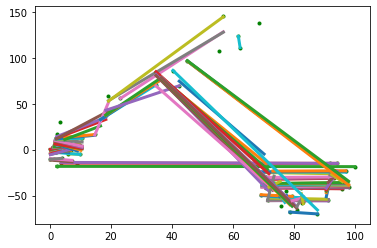

In [38]:
tol = 2
starts = np.unique(p)
drawn = set([])
plt.plot(x, y, 'g.')
for start in starts:
    indices = np.where(abs(p-start) < tol)[0]
    a, b = linefit(x[indices], y[indices], len(indices))
    if not (a, b) in drawn:
        plt.plot([x[min(indices)],x[max(indices)]], [a*x[min(indices)]+b, a*x[max(indices)]+b], linewidth=3, 
                 label='line: ({:.2f}, {:.2f})'.format(a,b))
        drawn.add((a,b))
